In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
os.chdir('<filepath>')

In [4]:
df1 = pd.read_csv('Position Salary .csv')
print(df1)

            Position  Level  Salary
0   Busienss Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4  120000
4    Country Manager      5  140000
5     Region Manager      6  130000
6            Partnor      7  100000
7     Senior Partnor      8   90000
8            C Level      9   95000
9               CEO      10   85000


In [5]:
x = df1.iloc[:,1:2].values
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [7]:
y = df1.iloc[:,2].values
print(y)

[ 45000  50000  60000 120000 140000 130000 100000  90000  95000  85000]


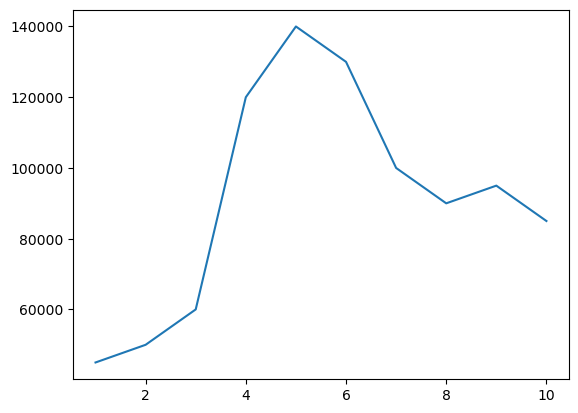

In [10]:
plt.plot(x,y)
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)
print(reg)

LinearRegression()


In [12]:
#prediction
lr_pred = reg.predict(x)
print(lr_pred)

[ 70909.09090909  75484.84848485  80060.60606061  84636.36363636
  89212.12121212  93787.87878788  98363.63636364 102939.39393939
 107515.15151515 112090.90909091]


In [13]:
lr_result =  pd.concat ([df1, pd.DataFrame(lr_pred,columns = ['Prediction'])],axis = 1 )
lr_result['Difference'] = lr_result['Salary'] - lr_result['Prediction']
print (lr_result)

            Position  Level  Salary     Prediction    Difference
0   Busienss Analyst      1   45000   70909.090909 -25909.090909
1  Junior Consultant      2   50000   75484.848485 -25484.848485
2  Senior Consultant      3   60000   80060.606061 -20060.606061
3            Manager      4  120000   84636.363636  35363.636364
4    Country Manager      5  140000   89212.121212  50787.878788
5     Region Manager      6  130000   93787.878788  36212.121212
6            Partnor      7  100000   98363.636364   1636.363636
7     Senior Partnor      8   90000  102939.393939 -12939.393939
8            C Level      9   95000  107515.151515 -12515.151515
9               CEO      10   85000  112090.909091 -27090.909091


In [14]:
accuracy = r2_score(y,lr_pred)
print(accuracy)

0.17895348198378502


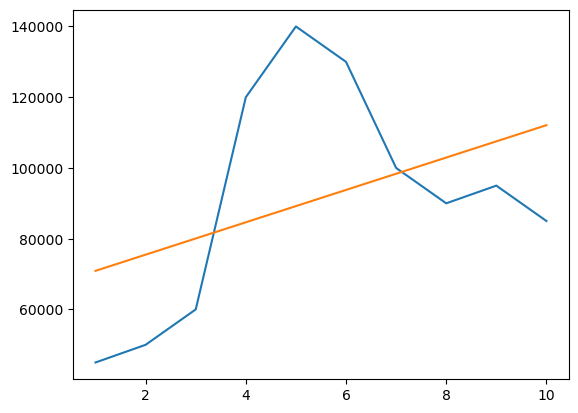

In [15]:
plt.plot(x,y)
plt.plot(x,lr_pred)
plt.show()

In [17]:
#Decission Tree: In the above the linear graph is highly inaccurate. So instead of linear regression a decission tree is used
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x,y)
print(dt)

DecisionTreeRegressor()


In [19]:
y_pred = dt.predict(x)
print(y_pred)

[ 45000.  50000.  60000. 120000. 140000. 130000. 100000.  90000.  95000.
  85000.]


In [20]:
accuracy = r2_score(y,y_pred)
print(accuracy)

1.0


In [21]:
result = pd.concat([df1, pd.DataFrame(y_pred, columns = ['Predictions'])],axis=1)
print(result)

            Position  Level  Salary  Predictions
0   Busienss Analyst      1   45000      45000.0
1  Junior Consultant      2   50000      50000.0
2  Senior Consultant      3   60000      60000.0
3            Manager      4  120000     120000.0
4    Country Manager      5  140000     140000.0
5     Region Manager      6  130000     130000.0
6            Partnor      7  100000     100000.0
7     Senior Partnor      8   90000      90000.0
8            C Level      9   95000      95000.0
9               CEO      10   85000      85000.0


In [25]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid

/var/folders/w1/c2vvrx9d61j9dv7jwtkkdg900000gn/T/ipykernel_6731/1185321862.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x),max(x),0.1)


array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [26]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
dt.predict(x_grid)

/var/folders/w1/c2vvrx9d61j9dv7jwtkkdg900000gn/T/ipykernel_6731/60794558.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x),max(x),0.1)


array([ 45000.,  45000.,  45000.,  45000.,  45000.,  45000.,  50000.,
        50000.,  50000.,  50000.,  50000.,  50000.,  50000.,  50000.,
        50000.,  50000.,  60000.,  60000.,  60000.,  60000.,  60000.,
        60000.,  60000.,  60000.,  60000.,  60000., 120000., 120000.,
       120000., 120000., 120000., 120000., 120000., 120000., 120000.,
       120000., 140000., 140000., 140000., 140000., 140000., 140000.,
       140000., 140000., 140000., 140000., 130000., 130000., 130000.,
       130000., 130000., 130000., 130000., 130000., 130000., 130000.,
       100000., 100000., 100000., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000.,  90000.,  90000.,  90000.,  90000.,
        90000.,  90000.,  90000.,  90000.,  90000.,  90000.,  95000.,
        95000.,  95000.,  95000.,  95000.,  95000.,  95000.,  95000.,
        95000.,  95000.,  85000.,  85000.,  85000.,  85000.])

In [27]:
reg.predict(x_grid)

array([ 70909.09090909,  71366.66666667,  71824.24242424,  72281.81818182,
        72739.39393939,  73196.96969697,  73654.54545455,  74112.12121212,
        74569.6969697 ,  75027.27272727,  75484.84848485,  75942.42424242,
        76400.        ,  76857.57575758,  77315.15151515,  77772.72727273,
        78230.3030303 ,  78687.87878788,  79145.45454545,  79603.03030303,
        80060.60606061,  80518.18181818,  80975.75757576,  81433.33333333,
        81890.90909091,  82348.48484848,  82806.06060606,  83263.63636364,
        83721.21212121,  84178.78787879,  84636.36363636,  85093.93939394,
        85551.51515152,  86009.09090909,  86466.66666667,  86924.24242424,
        87381.81818182,  87839.39393939,  88296.96969697,  88754.54545455,
        89212.12121212,  89669.6969697 ,  90127.27272727,  90584.84848485,
        91042.42424242,  91500.        ,  91957.57575758,  92415.15151515,
        92872.72727273,  93330.3030303 ,  93787.87878788,  94245.45454545,
        94703.03030303,  

/var/folders/w1/c2vvrx9d61j9dv7jwtkkdg900000gn/T/ipykernel_6731/4216413019.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x), max(x), 0.1) #starts the x value in graph from its minimum to maximum


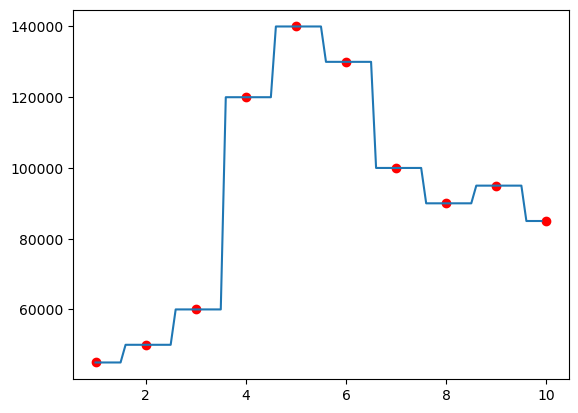

In [23]:
x_grid = np.arange(min(x), max(x), 0.1) #starts the x value in graph from its minimum to maximum
x_grid = x_grid.reshape((len(x_grid)),1)
plt.scatter(x,y, color = 'r')
plt.plot(x_grid, dt.predict(x_grid))
plt.show()

In [28]:
dt.predict([[3],[3.4],[3.8],[4.2]])

array([ 60000.,  60000., 120000., 120000.])